<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation-des-librairies,-des-fichiers-et-des-variables-d'environnement" data-toc-modified-id="Importation-des-librairies,-des-fichiers-et-des-variables-d'environnement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation des librairies, des fichiers et des variables d'environnement</a></span><ul class="toc-item"><li><span><a href="#Importation-des-librairies" data-toc-modified-id="Importation-des-librairies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importation des librairies</a></span></li><li><span><a href="#Importation-des-fichiers" data-toc-modified-id="Importation-des-fichiers-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importation des fichiers</a></span></li><li><span><a href="#Importation-des-variables-d'environnement" data-toc-modified-id="Importation-des-variables-d'environnement-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Importation des variables d'environnement</a></span></li></ul></li><li><span><a href="#Authentification-et-requête" data-toc-modified-id="Authentification-et-requête-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Authentification et requête</a></span></li><li><span><a href="#Récupération-des-sentiments-de-nos-tweets" data-toc-modified-id="Récupération-des-sentiments-de-nos-tweets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Récupération des sentiments de nos tweets</a></span><ul class="toc-item"><li><span><a href="#Les-tweets-bruts" data-toc-modified-id="Les-tweets-bruts-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Les tweets bruts</a></span></li></ul></li><li><span><a href="#Sources-:" data-toc-modified-id="Sources-:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sources :</a></span></li></ul></div>

Ce notebook permet de faire appel à l'API Text Analytics de Azure.
Il compare la prédiction d'un ensemble de tweets à la valeur cible de la base de données.

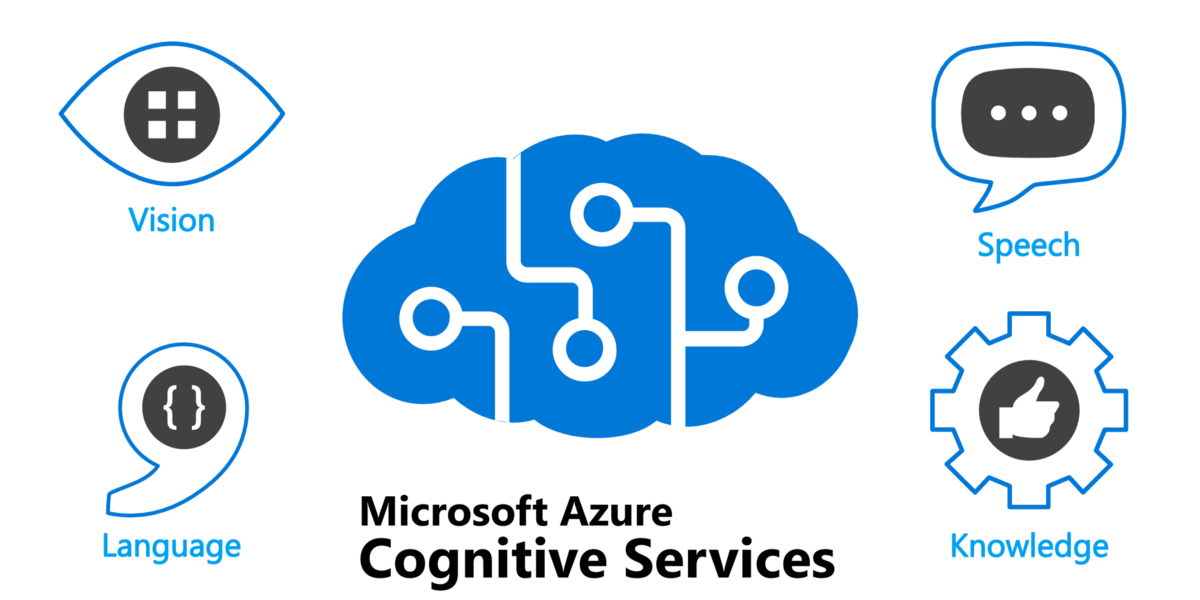

# Importation des librairies, des fichiers et des variables d'environnement

## Importation des librairies

In [1]:
# pandas pour la manipulation des données
import pandas as pd

In [2]:
# Importe les fonctions utiles à ce notebook
from my_functions import *

In [5]:
import os
from dotenv import load_dotenv
import time

In [6]:
from sklearn.metrics import accuracy_score, precision_score

## Importation des fichiers

In [7]:
# Chargement des fichiers des tweets bruts, nettoyés et transformés ainsi que la target.
X_1 = pd.read_csv(chemin + "X_1.csv")
X_2 = pd.read_csv(chemin + "X_2.csv")

## Importation des variables d'environnement

Nous récupérons les variables d'environnements utiles pour faire les requêtes à l'API Text Analytics de Azure.

In [8]:
load_dotenv(
    'api.env'
)  # Chargement du fichier de stockage des variables d'environnement
cle_azure = os.environ["COGNITIVE_AZURE_KEY"]
point_terminaison_azure = os.environ["COGNITIVE_AZURE_ENDPOINT"]

# Authentification et requête

Dans un premier temps nous devons nous identifier auprès du service. Nous créons une fonction qui va retourner la demande d'accès à l'API qui contient toutes les informations d'identification.

In [9]:
''' Cette fonction permet l'authentification au service Azure Text Analytics de notre groupe de ressource
    Entrées : 
    - key : clé d'authentification au service Azure Language
    - endpoint : point de terminaison https://XXXXXXXX.cognitiveservices.azure.com/

    Retourne:
    - text_analytics_client : objet TextAnalyticsClient
'''

# notre identification auprès du service Text Analytics
client = authenticate_client(cle_azure , point_terminaison_azure
)  

Ensuite, nous créons une requête pour traiter nos tweets. La réponse est sous la forme de probabilité pour 3 sentiments : positif, neutre et négatif.

In [10]:
''' Cette fonction permet ed récupérer la réponse à la requête. 
Entrées : 
client : objet TextAnalyticsClient
phrase : la phrase à analyser (must be valid UTF-8 encoded string)

Renvoie : 
[positif, neutre, negatif] : liste des réponses
positif : .confidence_scores.positive (Probabilité que le tweet ait un sentiment positif)
neutre : .confidence_scores.neutral (Probabilité que le tweet ait un sentiment neutre)
négatif : .confidence_scores.negative (Probabilité que le tweet ait un sentiment négatif)
'''

[positif, neutre, negatif] = sentiment_analysis(client, phrase)

# Récupération des sentiments de nos tweets

Pour pouvoir faire de meilleures comparaisons, nous changer les modalités de notre target. Maintenant positive = 1 et negative = 0.

In [11]:
X_1['target'] = X_1['target'].replace(['negative', 'positive'], [0, 1])

In [12]:
X_1

,target,tweet,tweet_nett,tweet_nett_BERT,tweet_lemm,tweet_stem
0,0,@James_Buchanan I'm moving and my time is alre...,user am moving and my ti ame is already tigh...,user am moving and my ti ame is already tigh...,user move ti ame already tight not ti ame mail...,user move ti ame alreadi tight not ti ame mail...
1,0,geography revision KILLSS,geography revision killss,geography revision KILLSS,geography revision kill,geographi revis killss
2,0,"Kids is sick, coughing and runny noses","kids is sick, coughing and runny noses","Kids is sick, coughing and runny noses",kid sick cough runny nose,kid sick cough runni nose
3,0,"@simalves WTFH???? *OMG, I'm swearing * ANOOP...","user wtfh???? *omg, am swearing * anoop des...","user WTFH???? *OMG, am swearing * ANOOP DES...",user wtfh omg swear anoop desai th high make h...,user wtfh omg swear anoop desai th highest mad...
4,0,The beach is soooo turqoise and wavvy right no...,the beach is soooo turqoise and wavvy right no...,The beach is soooo turqoise and wavvy right no...,beach soooo turqoise wavvy right feel like haw...,beach soooo turqois wavvi right feel like hawa...
...,...,...,...,...,...,...
4872,1,"well got the PA and Bass Amp sorted, just need...","well got the pa and bass amp sorted, just need...","well got the PA and Bass Amp sorted, just need...",well get pa bass amp sort need drummer contact,well got pa bass amp sort need drummer contact
4873,1,"@gendercrash Thanks fo &quot;the love, GC.&quo...","user thanks fo ""the love, gc."" very much app...","user Thanks fo ""the love, GC."" very much app...",user thanks fo love gc much appricate btw owe ...,user thank fo love gc much appric btw owe gras...
4874,1,just got a dress in the mail! Oooh #fb,just got dress in the mail! oooh hashtag,just got dress in the mail! Oooh hashtag,get dress mail oooh hashtag,got dress mail oooh hashtag
4875,1,"@SureSister When I went through rush, I called...","user when went through rush, called myself ""...","user When went through rush, called myself ""...",user go rush call rushling may not entirely pc...,user went rush call rushl may not entir pc though


In [14]:
# Sélection d'un échantillon d'environ 1200 tweets
X_1_test = sample_egalitaire(df_tweet, 1200)

In [15]:
X_1_test.target.value_counts()

0    585
1    585
Name: target, dtype: int64

## Les tweets bruts

In [16]:
start = time.time(
)  # pour obtenir le temps de calcul pour avoir une prédiction
X_1_test['prediction_azure_tweet'] = [
    sentiment_analysis(client, [sentence]) for sentence in X_1_test['tweet']
]
end = time.time()  # pour obtenir le temps de calcul pour avoir une prédict
temps_tweet = round(end - start, 1)

In [17]:
print("Le temps d'acquisition des prédictions est de", temps_tweet, 'sec.')

Le temps d'acquisition des prédictions est de 251.7 sec.


In [18]:
X_1_test.head(5)

,target,tweet,tweet_nett,tweet_nett_BERT,tweet_lemm,tweet_stem,prediction_azure_tweet
0,0,Just got home from a night of drinks and laugh...,just got home from night of drinks and laughs ...,Just got home from night of drinks and laughs ...,get home night drink laugh good friend exhaust...,got home night drink laugh good friend exhaust...,"[0.5, 0.0, 0.5]"
1,0,Still waiting for my anticipation to come back,still waiting for my anticipation to come back,Still waiting for my anticipation to come back,still wait anticipation come back,still wait anticip come back,"[0.84, 0.1, 0.06]"
2,0,Been shopping... bought some shizzle... nearly...,been shopping... bought some shizzle... nearly...,Been shopping... bought some shizzle... nearly...,shopping bought shizzle nearly packed westbour...,shop bought shizzl nearli pack westbourn park ...,"[0.77, 0.17, 0.06]"
3,0,MISSING MY HUSBAND TO BE,missing my husband to be,MISSING MY HUSBAND TO BE,miss husband,miss husband,"[0.04, 0.02, 0.94]"
4,0,Sitting here wondering if my internet will work.,sitting here wondering if my internet will work.,Sitting here wondering if my internet will work.,sit wonder if internet work,sit wonder if internet work,"[0.01, 0.98, 0.01]"


Le service azure fonctionne de la façon suivante :
Nous lui envoyons une phrase, par exemple "I had the best day of my life." et il retourne une probabilité pour chacun des 3 sentiments : 'positive', 'negative' ou 'neutral' : 

Sentence sentiment: Positive

Positive score: 1.00
Negative score: 0.00
Neutral score: 0.00.

Le retour se fait sous la forme [Positive score, Neutral score , Negative score] suivant la fonction requête que nous avons définie plus haut.

Dans un premier temps nous allons formater ces prédictions.

In [19]:
X_1_test.loc[:,
             'positive'] = X_1_test.prediction_azure_tweet.map(lambda x: x[0])
X_1_test.loc[:, 'neutre'] = X_1_test.prediction_azure_tweet.map(lambda x: x[1])
X_1_test.loc[:,
             'negative'] = X_1_test.prediction_azure_tweet.map(lambda x: x[2])

In [20]:
X_1_test.head(5)

,target,tweet,tweet_nett,tweet_nett_BERT,tweet_lemm,tweet_stem,prediction_azure_tweet,positive,neutre,negative
0,0,Just got home from a night of drinks and laugh...,just got home from night of drinks and laughs ...,Just got home from night of drinks and laughs ...,get home night drink laugh good friend exhaust...,got home night drink laugh good friend exhaust...,"[0.5, 0.0, 0.5]",0.50,0.00,0.50
1,0,Still waiting for my anticipation to come back,still waiting for my anticipation to come back,Still waiting for my anticipation to come back,still wait anticipation come back,still wait anticip come back,"[0.84, 0.1, 0.06]",0.84,0.10,0.06
2,0,Been shopping... bought some shizzle... nearly...,been shopping... bought some shizzle... nearly...,Been shopping... bought some shizzle... nearly...,shopping bought shizzle nearly packed westbour...,shop bought shizzl nearli pack westbourn park ...,"[0.77, 0.17, 0.06]",0.77,0.17,0.06
3,0,MISSING MY HUSBAND TO BE,missing my husband to be,MISSING MY HUSBAND TO BE,miss husband,miss husband,"[0.04, 0.02, 0.94]",0.04,0.02,0.94
4,0,Sitting here wondering if my internet will work.,sitting here wondering if my internet will work.,Sitting here wondering if my internet will work.,sit wonder if internet work,sit wonder if internet work,"[0.01, 0.98, 0.01]",0.01,0.98,0.01


Nous avons 3 modalités pour la prédiction alors que nous n'avions que deux modalités pour la target. Dans ce cas, nous allons transformer les 3 modalités en une seule. Nous faisons le choix de considérer le sentiment comme positif (target 1) si la probabilité de prédiction "positive" est supérieure à la probabilité de prédiction "negative. A l'inverse, si la probabilité de prédiction "negative" est supérieure à la probabilité de prédiction "positive", le sentiment associé sera considéré comme negatif (target 0).

In [21]:
X_1_test['prediction_tweet'] = [
    1 if X_1_test.loc[i, 'positive'] > X_1_test.loc[i, 'negative'] else 0
    for i in X_1_test.index
]

In [22]:
X_1_test

,target,tweet,tweet_nett,tweet_nett_BERT,tweet_lemm,tweet_stem,prediction_azure_tweet,positive,neutre,negative,prediction_tweet
0,0,Just got home from a night of drinks and laugh...,just got home from night of drinks and laughs ...,Just got home from night of drinks and laughs ...,get home night drink laugh good friend exhaust...,got home night drink laugh good friend exhaust...,"[0.5, 0.0, 0.5]",0.50,0.00,0.50,0
1,0,Still waiting for my anticipation to come back,still waiting for my anticipation to come back,Still waiting for my anticipation to come back,still wait anticipation come back,still wait anticip come back,"[0.84, 0.1, 0.06]",0.84,0.10,0.06,1
2,0,Been shopping... bought some shizzle... nearly...,been shopping... bought some shizzle... nearly...,Been shopping... bought some shizzle... nearly...,shopping bought shizzle nearly packed westbour...,shop bought shizzl nearli pack westbourn park ...,"[0.77, 0.17, 0.06]",0.77,0.17,0.06,1
3,0,MISSING MY HUSBAND TO BE,missing my husband to be,MISSING MY HUSBAND TO BE,miss husband,miss husband,"[0.04, 0.02, 0.94]",0.04,0.02,0.94,0
4,0,Sitting here wondering if my internet will work.,sitting here wondering if my internet will work.,Sitting here wondering if my internet will work.,sit wonder if internet work,sit wonder if internet work,"[0.01, 0.98, 0.01]",0.01,0.98,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...
1165,1,@GeneJuarez Thanks 4 the follow. Congrats on ...,"user thanks the follow. congrats on the , ...","user Thanks the follow. Congrats on the , ...",user thanks follow congrats follower feel free...,user thank follow congrat follow feel free rea...,"[0.89, 0.1, 0.01]",0.89,0.10,0.01,1
1166,1,@barefootwest Hey! Vote for @TomFelton! He's ...,user hey! vote for user he is currently in...,user Hey! Vote for user He is currently in...,user hey vote user currently rd place link spr...,user hey vote user current rd place link sprea...,"[0.58, 0.39, 0.03]",0.58,0.39,0.03,1
1167,1,"Finally Googled &quot;Wicked,&quot; the Broadw...","finally googled ""wicked,"" the broadway product...","Finally Googled ""Wicked,"" the Broadway product...",finally google wicked broadway production go h...,final googl wick broadway product go hashtag t...,"[0.22, 0.01, 0.77]",0.22,0.01,0.77,0
1168,1,@bengillam I went to see the original first mo...,user went to see the original first movie at...,user went to see the original first movie at...,user go see original first movie cinema come o...,user went see origin first movi cinema came ou...,"[0.18, 0.67, 0.15]",0.18,0.67,0.15,1


Nous pouvons maintenant évaluer la qualité de la détection de sentiment via ce service en calculant la précision et l'exactitude des prédictions.

In [23]:
print(
    "Le score accuracy est :",
    round(accuracy_score(X_1_test['target'], X_1_test['prediction_tweet']), 2))
print(
    "Le score precision est :",
    round(precision_score(X_1_test['target'], X_1_test['prediction_tweet']),
          2))

Le score accuracy est : 0.72
Le score precision est : 0.7


              precision    recall  f1-score   support

           0       0.75      0.67      0.71       585
           1       0.70      0.77      0.73       585

    accuracy                           0.72      1170
   macro avg       0.72      0.72      0.72      1170
weighted avg       0.72      0.72      0.72      1170

Matrice de confusion


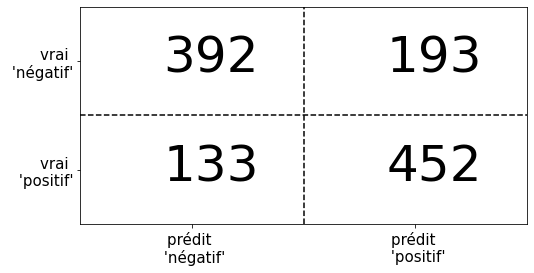

In [25]:
""" Cette fonction affiche le rapport de classification et la matrice de confusion d'une prédiction.
Entrées :
df : le dataframe
cible : la variable cible
prediction : la varible de prédiction
x_ticks : la légende pour les abscisses de la table
y_ticks : la légence pour les ordonnées de la table
"""

# Détermination de la matrice de confusion
plot_confusion_matrix_illustration(X_1_test,'target', 'prediction_tweet', "prédit \n 'négatif'", "prédit \n 'positif'",  "vrai \n 'positif'", "vrai \n 'négatif'")

Voici les résultats du service cognitif d'azure sont globalement assez bon notament pour la détection des tweets avec des sentiments négatifs. Mais sa performance est égale voire moins bonne que pour les modèles qui n'entraînent pas un coût conséquent. 

In [26]:
X_1_test.to_csv(chemin + "X_1_api.csv", index=False)

# Sources :

https://docs.microsoft.com/fr-fr/azure/cognitive-services/language-service/sentiment-opinion-mining/overview

https://docs.microsoft.com/fr-fr/azure/cognitive-services/language-service/overview

https://docs.microsoft.com/fr-fr/azure/////////cognitive-services/language-service/sentiment-opinion-mining/quickstart?pivots=programming-language-csharp